# K-nearest Neighbors

In [1]:
import pandas as pd
import numpy as np

sna = pd.read_csv("Social_Network_Ads.csv")
sna

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [2]:
sna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [3]:
sna.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
sna_grouped_gender = sna.groupby("Gender",as_index=False).mean(numeric_only=True)
sna_grouped_gender

,Gender,User ID,Age,EstimatedSalary,Purchased
0,Female,1.569331e+07,38.411765,71759.803922,0.377451
1,Male,1.568970e+07,36.867347,67642.857143,0.336735


In [5]:
x = sna.iloc[:, [2,3]].values
x[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [6]:
y = sna.iloc[:,4].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.25,random_state=42)
len(x_train), len(x_test), len(y_train), len(y_test)

(300, 100, 300, 100)

In [8]:
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

x_train[:5]

array([[ 1.8925893 ,  1.52189404],
       [ 0.1250379 ,  0.03213212],
       [ 0.9106163 , -1.31157471],
       [-1.34792161, -1.48684082],
       [-0.169554  , -0.58129926]])

In [9]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [11]:
from sklearn.metrics import confusion_matrix

mc = confusion_matrix(y_test, y_pred)
mc

array([[58,  5],
       [ 3, 34]], dtype=int64)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.92

## Visualization

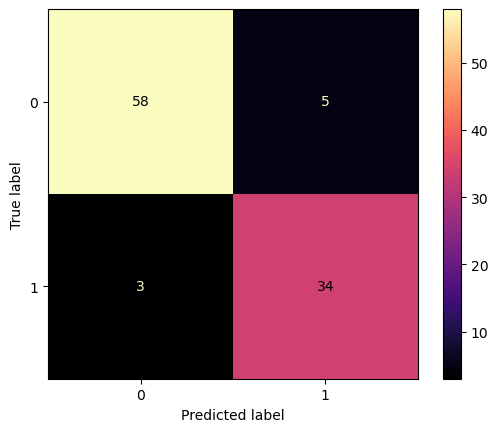

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

colors = sns.color_palette("magma",as_cmap=True)

disp = ConfusionMatrixDisplay(confusion_matrix=mc)
disp.plot(cmap=colors)

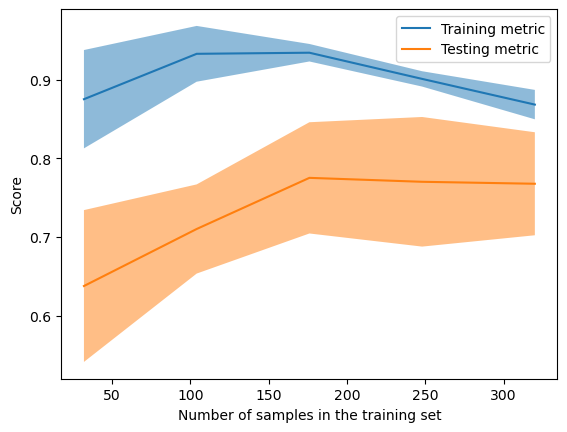

In [14]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(classifier,X=x,y=y,score_type="both")

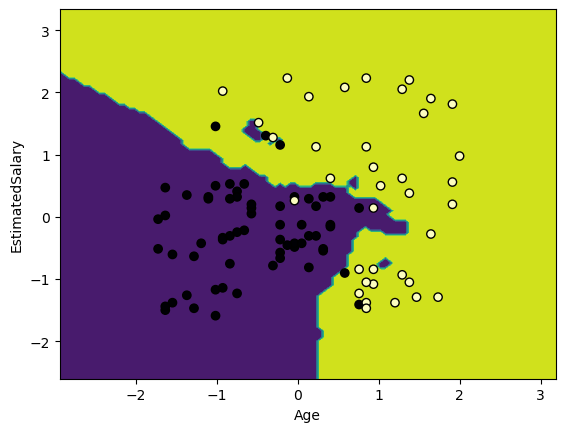

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

disp = DecisionBoundaryDisplay.from_estimator(classifier,x_train,
                                              response_method="predict",
                                              xlabel='Age',
                                              ylabel='EstimatedSalary')
# disp.ax_.scatter(X_treino[:, 0], X_treino[:, 1], c=Y_treino, edgecolor="k")
disp.ax_.scatter(x_test[:, 0],x_test[:, 1],c=y_test,edgecolor="k",
                 cmap="magma")